In [6]:
# ✅ Install kagglehub if not already installed
!pip install kagglehub

# 🔽 Download the wildfire dataset
import kagglehub

dataset_path = kagglehub.dataset_download('elmadafri/the-wildfire-dataset')
print('✅ Dataset downloaded to:', dataset_path)


✅ Dataset downloaded to: /kaggle/input/the-wildfire-dataset


In [7]:
# 📦 Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

print('✅ All necessary libraries imported.')


✅ All necessary libraries imported.


In [8]:
# ⚙️ Check if GPU is available in Colab
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
    print('🚀 GPU is available and ready to use.')
else:
    print('⚠️ No GPU detected, using CPU.')

⚠️ No GPU detected, using CPU.


In [9]:
# 🔍 Check dataset folder structure to confirm paths
print("📂 Exploring dataset folder structure:\n")
for root, dirs, files in os.walk(dataset_path):
    print(root)


📂 Exploring dataset folder structure:

/kaggle/input/the-wildfire-dataset
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/nofire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/fire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/fire


In [10]:
# 🗂️ Set dataset paths (based on folder structure)
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [11]:
# 🔎 List all available classes
classes = os.listdir(train_dir)
num_classes = len(classes)

print(f'🔥 Total number of classes: {num_classes}')
print(f'Classes: {classes}')


🔥 Total number of classes: 2
Classes: ['nofire', 'fire']


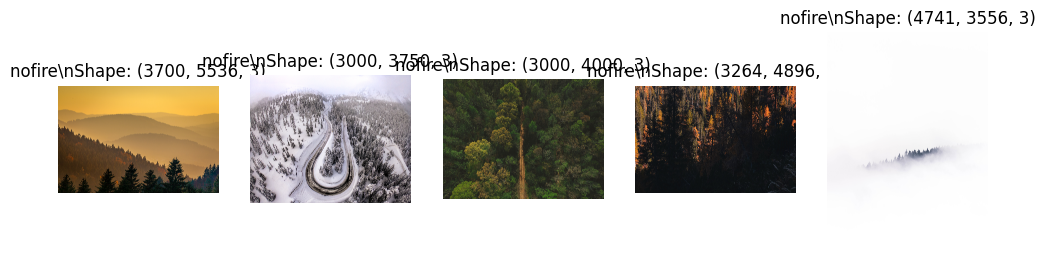

In [12]:
# 🖼️ Visualize 5 images from the first class
plt.figure(figsize=(12, 10))
for idx in range(5):
    img_dir = os.path.join(train_dir, classes[0])
    img_file = os.listdir(img_dir)[idx]
    img_path = os.path.join(img_dir, img_file)
    img = plt.imread(img_path)

    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(f'{classes[0]}\\nShape: {img.shape}')
    plt.axis('off')
plt.show()


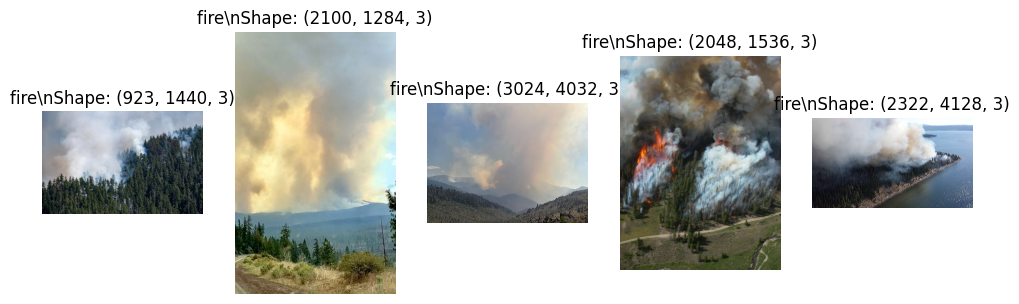

In [13]:
# 🖼️ Visualize 5 images from the second class
plt.figure(figsize=(12, 10))
for idx in range(5):
    img_dir = os.path.join(train_dir, classes[1])
    img_file = os.listdir(img_dir)[idx]
    img_path = os.path.join(img_dir, img_file)
    img = plt.imread(img_path)

    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(f'{classes[1]}\\nShape: {img.shape}')
    plt.axis('off')
plt.show()


In [14]:
# ⚙️ Prepare ImageDataGenerators
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_loader = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_loader = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_loader = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [15]:
# 🔑 Map class indices
class_mapping = train_loader.class_indices
class_names = list(class_mapping.keys())
print('Class names:', class_names)


Class names: ['fire', 'nofire']


In [16]:
# 🏗️ Build CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [17]:
# ⚙️ Compile the model and print summary
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)